In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def get_X():
    return 2 * np.random.rand(100, 1)


def get_y(X):
    return 3 + 4 * X + np.random.randn(100, 1)


In [3]:
X = get_X()
y = get_y(X)

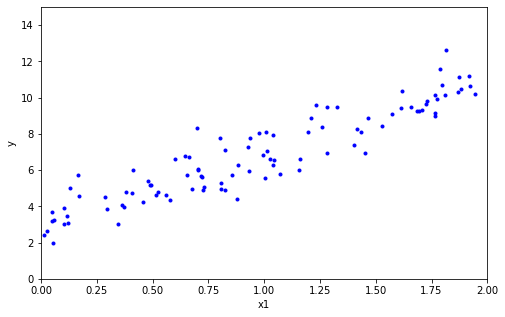

In [4]:
plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

# Linear Regression from scratch

In [14]:
X_mean = np.mean(X)
y_mean = np.mean(y)
n = len(X)
numerator = 0
denominator = 0

for i in range(n):
    numerator += (X[i] - X_mean) * (y[i] - y_mean)
    denominator += (X[i] - X_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * X_mean)
print(b0, b1)

[3.0091556] [3.9485469]


# Linear Regression closed form 

In [15]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[[3.0091556]
 [3.9485469]]


In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)

print(y_predict)

[[ 3.0091556 ]
 [10.90624941]]


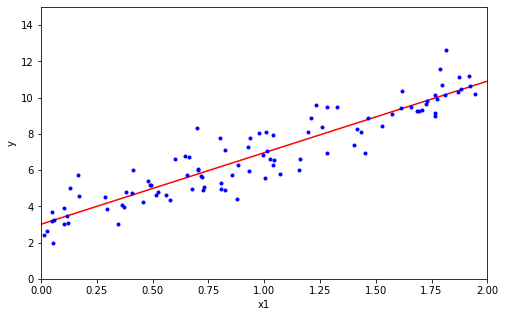

In [7]:
plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

# Linear Regression Scikit-Learn

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.0091556]), array([[3.9485469]]))

In [9]:
lin_y = lin_reg.predict(X_new)
lin_y

array([[ 3.0091556 ],
       [10.90624941]])